# Apple Stock LSTM Prediction Model

Import needed Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

Import dataset:

In [2]:
df=pd.read_csv("data.csv")
df.head()

,Date,Close,Volume,Open,High,Low
0,07/01/2022,$138.93,71051550,$136.04,$139.04,$135.66
1,06/30/2022,$136.72,98964470,$137.25,$138.37,$133.7737
2,06/29/2022,$139.23,66242410,$137.46,$140.67,$136.67
3,06/28/2022,$137.44,67315330,$142.13,$143.422,$137.325
4,06/27/2022,$141.66,70207910,$142.695,$143.49,$140.965


Substract Date and close columns:

In [3]:
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,07/01/2022,$138.93
1,06/30/2022,$136.72
2,06/29/2022,$139.23
3,06/28/2022,$137.44
4,06/27/2022,$141.66


Remove “$” sign:

In [4]:
df = df.replace({'\$':''}, regex = True)

Convert closing price datatype to float and date to datetime:

In [5]:
df = df.astype({"Close": float})
df["Date"] = pd.to_datetime(df.Date, format="%m/%d/%Y")
df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

Definde date as index for visualization:

In [6]:
df.index = df['Date']

Construct the initial line chart:

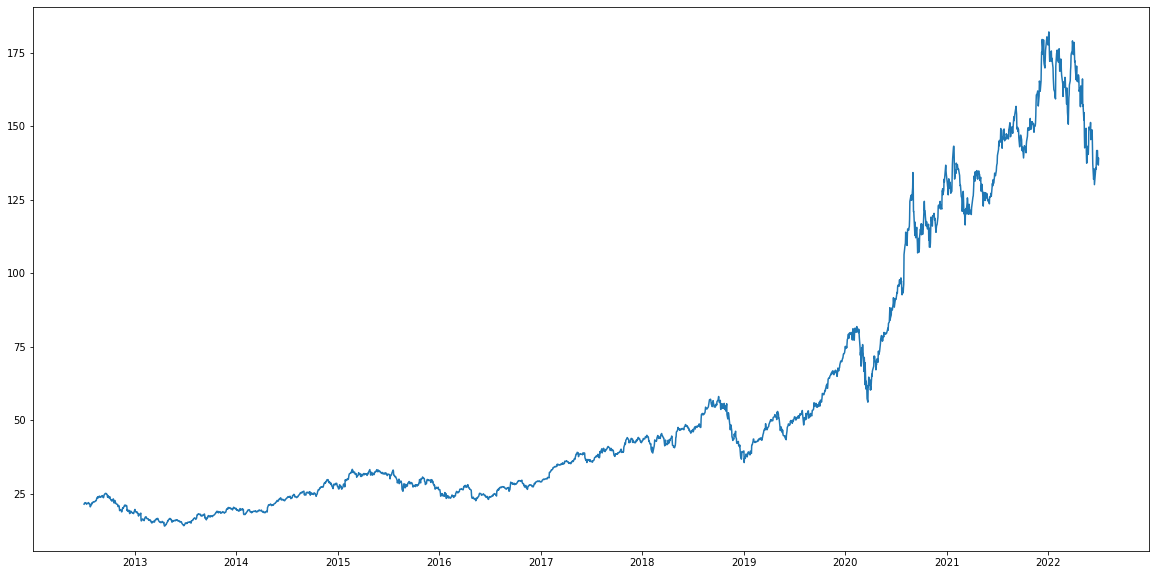

In [7]:
plt.plot(df["Close"],label='Close Price history')

# Long Short-Term Memory Prediction Model:

Data preparation:

In [8]:
df = df.sort_index(ascending=True,axis=0)
data = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    data["Date"][i]=df['Date'][i]
    data["Close"][i]=df["Close"][i]
data.head()

,Date,Close
0,2012-07-03 00:00:00,21.4075
1,2012-07-05 00:00:00,21.7836
2,2012-07-06 00:00:00,21.6386
3,2012-07-09 00:00:00,21.9247
4,2012-07-10 00:00:00,21.7218


Min-Max Scaler:

In [9]:
scaler=MinMaxScaler(feature_range=(0,1))
data.index=data.Date
data.drop('Date',axis=1,inplace=True)
final_data = data.values
train_data=final_data[0:200,:]
valid_data=final_data[200:,:]
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_data)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

Define LSTM Model:

In [11]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [10]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(np.shape(x_train_data)[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
model_data=data[len(data)-len(valid_data)-60:].values
model_data=model_data.reshape(-1,1)
model_data=scaler.transform(model_data)

2022-07-08 16:19:01.343908: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-08 16:19:01.344296: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-08 16:19:01.346931: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


NotImplementedError: Cannot convert a symbolic Tensor (lstm/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

Train & Test Data:

In [ ]:
lstm_model.compile(loss=’mean_squared_error’,optimizer=’adam’)
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)
X_test=[]
for i in range(60,model_data.shape[0]):
    X_test.append(model_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

Prediction:

In [ ]:
predicted_stock_price=lstm_model.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

# Prediction Result:

In [ ]:
train_data=data[:200]
valid_data=data[200:]
valid_data['Predictions']=predicted_stock_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])